## Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Îç∞Ïù¥ÌÑ∞ÏÖã ÏïïÏ∂ï Ìï¥Ï†ú

In [ ]:
!unzip /content/drive/MyDrive/hole_dataset.ZIP -d /content/

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
  inflating: /content/synthetic_data/train/segmentations/file_000006356.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006357.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006358.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006359.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006360.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006361.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006362.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006363.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006364.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006365.png  
  inflating: /content/synthetic_data/train/segmentations/file_000006366.png  
  inflating: /content/synthetic_data/train/segmentations/f

---
# EDA

## ÎùºÏù¥Î∏åÎü¨Î¶¨ import & Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
with open('/content/real_labeled_test_set/coco_segmentations.json', 'r') as f:
    data = json.load(f)

# 2. DataFrameÏúºÎ°ú Î≥ÄÌôò
images_df = pd.DataFrame(data['images'])
annotations_df = pd.DataFrame(data['annotations'])
categories_df = pd.DataFrame(data['categories'])

print("=== Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Images: {len(images_df)}")
print(f"Annotations: {len(annotations_df)}")
print(f"Categories: {len(categories_df)}")

=== Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Images: 1680
Annotations: 6697
Categories: 7


### Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ & Ïù¥ÎØ∏ÏßÄ Î∂ÑÌè¨ Î∂ÑÏÑù

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
category_counts = annotations_df['category_id'].value_counts().sort_index()
print("\n=== ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===")
for cat_id, count in category_counts.items():
    cat_name = categories_df[categories_df['id'] == cat_id]['name'].iloc[0]
    print(f"{cat_name} (ID: {cat_id}): {count}Í∞ú")

# Ïπ¥Î©îÎùºÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò
cam_distribution = images_df['cam_name'].value_counts()
print("\n=== Ïπ¥Î©îÎùºÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ===")
print(cam_distribution)

# trigger_mmÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò
trigger_distribution = images_df['trigger_mm'].value_counts().sort_index()
print("\n=== Ï¥¨ÏòÅ Í±∞Î¶¨Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ===")
print(trigger_distribution)

# inspection_idÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Î∂ÄÌíàÎãπ Î™á Ïû•Ïî© Ï¥¨ÏòÅÎêòÏóàÎäîÏßÄ)
images_per_inspection = images_df['inspection_id'].value_counts()
print("\n=== Î∂ÄÌíàÎãπ Ï¥¨ÏòÅ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌÜµÍ≥Ñ ===")
print(f"ÌèâÍ∑†: {images_per_inspection.mean():.2f}Ïû•")
print(f"ÏµúÏÜå: {images_per_inspection.min()}Ïû•")
print(f"ÏµúÎåÄ: {images_per_inspection.max()}Ïû•")
print(f"ÌëúÏ§ÄÌé∏Ï∞®: {images_per_inspection.std():.2f}")


=== ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===
AX1 (ID: 0): 354Í∞ú
BY1 (ID: 1): 1467Í∞ú
CY1 (ID: 2): 630Í∞ú
DY1 (ID: 3): 1073Í∞ú
DY2 (ID: 4): 1280Í∞ú
DY3 (ID: 5): 846Í∞ú
DY4 (ID: 6): 1047Í∞ú

=== Ïπ¥Î©îÎùºÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ===
cam_name
Z1CAM08    320
Z1CAM07    320
Z1CAM05    320
Z1CAM02    240
Z1CAM06    240
Z1CAM04    160
Z1CAM03     80
Name: count, dtype: int64

=== Ï¥¨ÏòÅ Í±∞Î¶¨Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ===
trigger_mm
700     240
800      80
1100    160
1200    480
1300    240
1500     80
1700    320
1800     80
Name: count, dtype: int64

=== Î∂ÄÌíàÎãπ Ï¥¨ÏòÅ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 19.53Ïû•
ÏµúÏÜå: 3Ïû•
ÏµúÎåÄ: 21Ïû•
ÌëúÏ§ÄÌé∏Ï∞®: 4.10


### Î∞îÏö¥Îî© Î∞ïÏä§ Î∂ÑÏÑù

In [ ]:
# bbox Ï†ïÎ≥¥ Ï∂îÏ∂ú
annotations_df['bbox_x'] = annotations_df['bbox'].apply(lambda x: x[0])
annotations_df['bbox_y'] = annotations_df['bbox'].apply(lambda x: x[1])
annotations_df['bbox_width'] = annotations_df['bbox'].apply(lambda x: x[2])
annotations_df['bbox_height'] = annotations_df['bbox'].apply(lambda x: x[3])

print("\n=== Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===")
print("Width ÌÜµÍ≥Ñ:")
print(annotations_df['bbox_width'].describe())
print("\nHeight ÌÜµÍ≥Ñ:")
print(annotations_df['bbox_height'].describe())
print("\nArea ÌÜµÍ≥Ñ:")
print(annotations_df['area'].describe())

# ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† ÌôÄ ÌÅ¨Í∏∞
print("\n=== ÌÅ¥ÎûòÏä§Î≥Ñ ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===")
for cat_id in sorted(annotations_df['category_id'].unique()):
    cat_name = categories_df[categories_df['id'] == cat_id]['name'].iloc[0]
    cat_data = annotations_df[annotations_df['category_id'] == cat_id]
    print(f"\n{cat_name} (ID: {cat_id}):")
    print(f"  ÌèâÍ∑† Width: {cat_data['bbox_width'].mean():.2f}")
    print(f"  ÌèâÍ∑† Height: {cat_data['bbox_height'].mean():.2f}")
    print(f"  ÌèâÍ∑† Area: {cat_data['area'].mean():.2f}")


=== Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===
Width ÌÜµÍ≥Ñ:
count    6697.000000
mean      155.391686
std       241.746670
min         2.339327
25%        21.977016
50%        39.115204
75%        91.962341
max      1070.226440
Name: bbox_width, dtype: float64

Height ÌÜµÍ≥Ñ:
count    6697.000000
mean      153.258765
std       288.811427
min         4.196721
25%        24.957703
50%        37.586563
75%        71.619048
max      1062.536133
Name: bbox_height, dtype: float64

Area ÌÜµÍ≥Ñ:
count    6.697000e+03
mean     7.151520e+04
std      1.961026e+05
min      1.145693e+01
25%      6.072661e+02
50%      1.455527e+03
75%      3.388152e+04
max      1.050891e+06
Name: area, dtype: float64

=== ÌÅ¥ÎûòÏä§Î≥Ñ ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===

AX1 (ID: 0):
  ÌèâÍ∑† Width: 239.64
  ÌèâÍ∑† Height: 192.57
  ÌèâÍ∑† Area: 42698.78

BY1 (ID: 1):
  ÌèâÍ∑† Width: 554.61
  ÌèâÍ∑† Height: 551.96
  ÌèâÍ∑† Area: 312754.49

CY1 (ID: 2):
  ÌèâÍ∑† Width: 20.00
  ÌèâÍ∑† Height: 22.26
  ÌèâÍ∑† Area: 485.12

DY1 (ID: 3):
  Ìè

### ÌÅ¥ÎûòÏä§ Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
- ÌÅ¥ÎûòÏä§ Î≥Ñ ÌèâÍ∑† ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ Ï∂úÎ†•

In [ ]:
import pandas as pd

# Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ÏöîÏïΩÏùÑ DataFrameÏúºÎ°ú ÏÉùÏÑ±
bbox_stats = pd.DataFrame({
    'bbox_width': annotations_df['bbox_width'].describe(),
    'bbox_height': annotations_df['bbox_height'].describe(),
    'area': annotations_df['area'].describe()
})
print("\n=== Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===")
print(bbox_stats)

# ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ DataFrame ÏÉùÏÑ±
class_stats_list = []

for cat_id in sorted(annotations_df['category_id'].unique()):
    cat_name = categories_df[categories_df['id'] == cat_id]['name'].iloc[0]
    cat_data = annotations_df[annotations_df['category_id'] == cat_id]
    class_stats_list.append({
        'category_id': cat_id,
        'category_name': cat_name,
        'mean_bbox_width': cat_data['bbox_width'].mean(),
        'mean_bbox_height': cat_data['bbox_height'].mean(),
        'mean_area': cat_data['area'].mean()
    })

class_stats_df = pd.DataFrame(class_stats_list)

print("\n=== ÌÅ¥ÎûòÏä§Î≥Ñ ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===")
print(class_stats_df)


=== Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===
        bbox_width  bbox_height          area
count  6697.000000  6697.000000  6.697000e+03
mean    155.391686   153.258765  7.151520e+04
std     241.746670   288.811427  1.961026e+05
min       2.339327     4.196721  1.145693e+01
25%      21.977016    24.957703  6.072661e+02
50%      39.115204    37.586563  1.455527e+03
75%      91.962341    71.619048  3.388152e+04
max    1070.226440  1062.536133  1.050891e+06

=== ÌÅ¥ÎûòÏä§Î≥Ñ ÌôÄ ÌÅ¨Í∏∞ ÌÜµÍ≥Ñ ===
   category_id category_name  mean_bbox_width  mean_bbox_height      mean_area
0            0           AX1       239.639180        192.566095   42698.783656
1            1           BY1       554.608825        551.961813  312754.493851
2            2           CY1        20.000598         22.261291     485.117819
3            3           DY1        40.560396         39.850268    1714.996624
4            4           DY2        31.392646         32.852942    1118.192492
5            5           DY3    

### Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù
- ÎùºÎ≤®ÎßÅ ÏôÑÎ£åÏú®(is_graded ÎπÑÏú®)
- segmentation Ï†ïÎ≥¥ Îì±

In [ ]:
# is_graded ÎπÑÏú® (ÎùºÎ≤®ÎßÅ ÏôÑÎ£åÏú®)
grading_status = annotations_df['is_graded'].value_counts()
print("\n=== ÎùºÎ≤®ÎßÅ ÌíàÏßà ÏÉÅÌÉú ===")
print(grading_status)
print(f"ÏôÑÎ£åÏú®: {grading_status.get(True, 0) / len(annotations_df) * 100:.2f}%")

# segmentationÏù¥ ÎπÑÏñ¥ÏûàÎäî ÎπÑÏú®
empty_segmentation_count = sum(1 for _, row in annotations_df.iterrows() if not row['segmentation'])
print(f"\n=== Segmentation Ï†ïÎ≥¥ ===")
print(f"Îπà segmentation: {empty_segmentation_count}Í∞ú ({empty_segmentation_count/len(annotations_df)*100:.2f}%)")

# ignore, iscrowd ÏÉÅÌÉú
print("\n=== Í∏∞ÌÉÄ ÌîåÎûòÍ∑∏ ===")
print(f"ignore=1Ïù∏ Îç∞Ïù¥ÌÑ∞: {(annotations_df['ignore'] == 1).sum()}Í∞ú")
print(f"iscrowd=1Ïù∏ Îç∞Ïù¥ÌÑ∞: {(annotations_df['iscrowd'] == 1).sum()}Í∞ú")


=== ÎùºÎ≤®ÎßÅ ÌíàÏßà ÏÉÅÌÉú ===
is_graded
True     4097
False    2600
Name: count, dtype: int64
ÏôÑÎ£åÏú®: 61.18%

=== Segmentation Ï†ïÎ≥¥ ===
Îπà segmentation: 6697Í∞ú (100.00%)

=== Í∏∞ÌÉÄ ÌîåÎûòÍ∑∏ ===
ignore=1Ïù∏ Îç∞Ïù¥ÌÑ∞: 0Í∞ú
iscrowd=1Ïù∏ Îç∞Ïù¥ÌÑ∞: 0Í∞ú


### Ïù¥ÎØ∏ÏßÄÎãπ Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Î∂ÑÏÑù

In [ ]:
# Ïù¥ÎØ∏ÏßÄÎãπ ÌôÄ Í∞úÏàò Î∂ÑÌè¨
annotations_per_image = annotations_df['image_id'].value_counts()
print("\n=== Ïù¥ÎØ∏ÏßÄÎãπ Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Í∞úÏàò ===")
print(f"ÌèâÍ∑†: {annotations_per_image.mean():.2f}Í∞ú")
print(f"ÏµúÏÜå: {annotations_per_image.min()}Í∞ú")
print(f"ÏµúÎåÄ: {annotations_per_image.max()}Í∞ú")
print("\nÍ∞úÏàòÎ≥Ñ Î∂ÑÌè¨:")
print(annotations_per_image.value_counts().sort_index())

# Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖòÏù¥ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
all_image_ids = set(images_df['id'])
annotated_image_ids = set(annotations_df['image_id'])
missing_annotations = all_image_ids - annotated_image_ids
print(f"\nÏñ¥ÎÖ∏ÌÖåÏù¥ÏÖòÏù¥ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ: {len(missing_annotations)}Í∞ú")


=== Ïù¥ÎØ∏ÏßÄÎãπ Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Í∞úÏàò ===
ÌèâÍ∑†: 4.51Í∞ú
ÏµúÏÜå: 1Í∞ú
ÏµúÎåÄ: 7Í∞ú

Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨:
count
1     16
2    184
3     79
4    217
5    790
6    135
7     64
Name: count, dtype: int64

Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖòÏù¥ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ: 195Í∞ú


## üî∑ Ìè∞Ìä∏ ÏÑ§Ïπò

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (20.5 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# ÏÑ§ÏπòÎêú ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# Ìè∞Ìä∏ Îì±Î°ù
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# ÏùåÏàò Î∂ÄÌò∏Í∞Ä Íπ®ÏßÄÎäî Î¨∏Ï†ú Î∞©ÏßÄ
matplotlib.rcParams['axes.unicode_minus'] = False

## ÏãúÍ∞ÅÌôî
### Ï†ÑÏ≤¥ Î∂ÑÌè¨ Í∞úÏöî

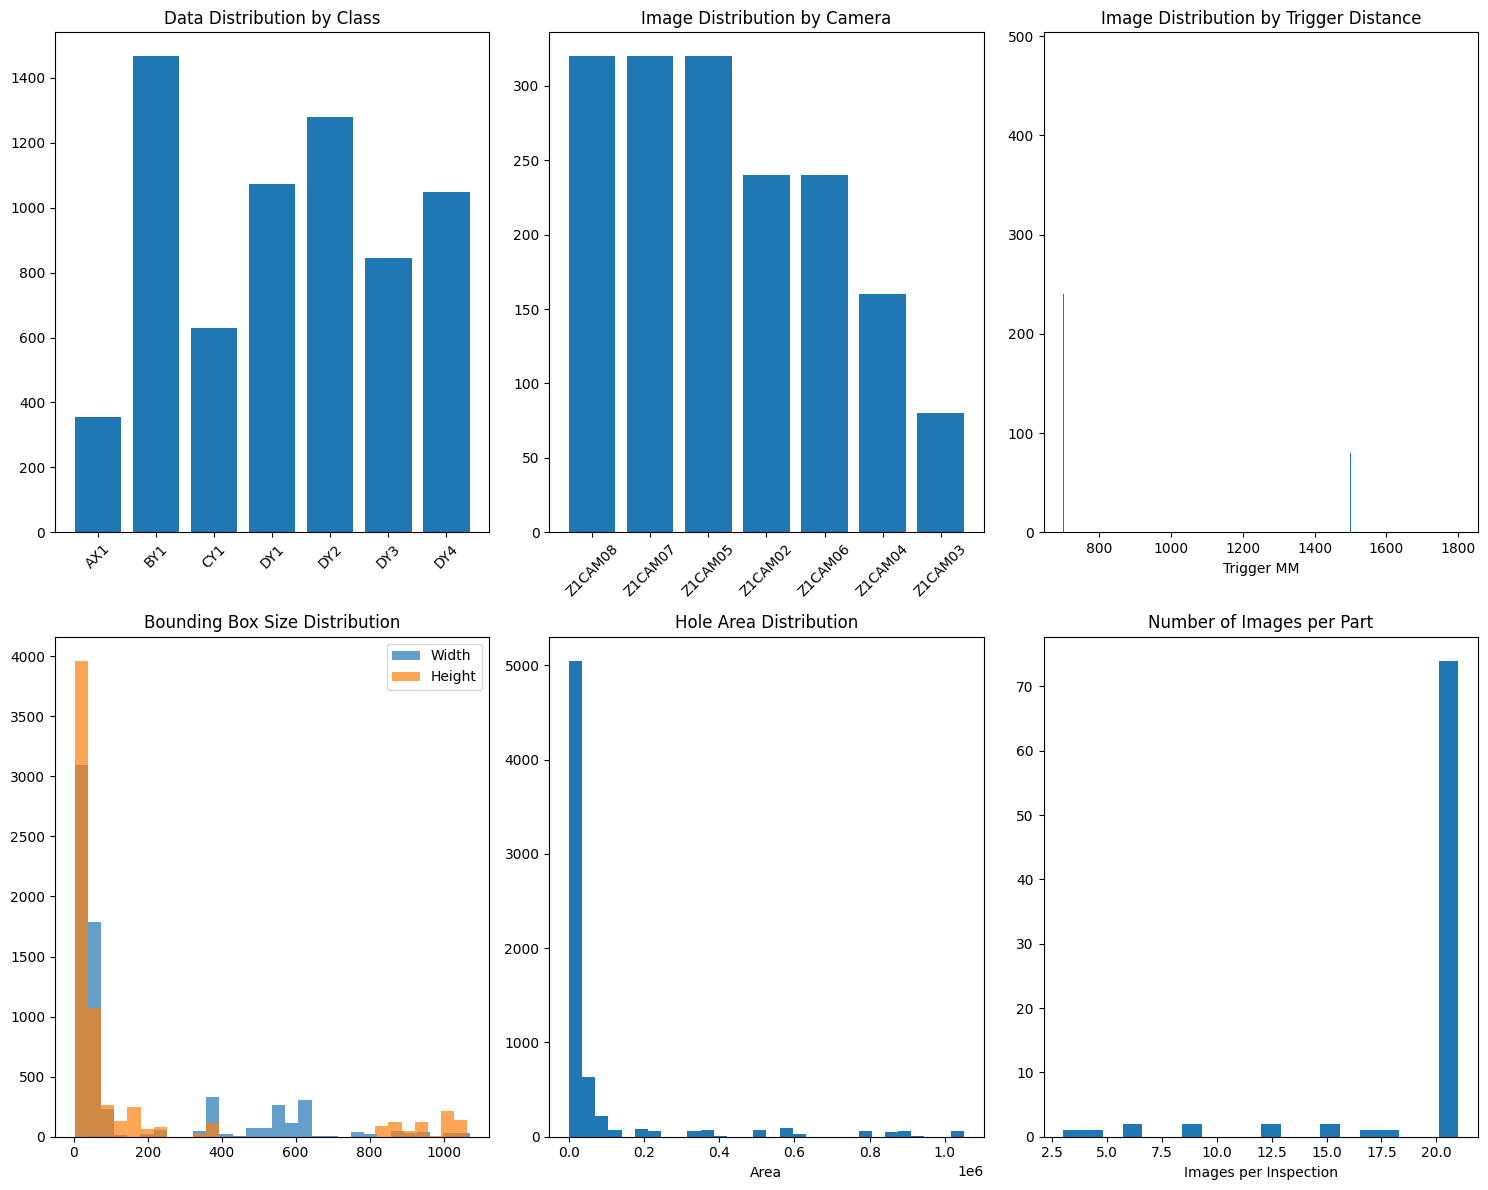

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# 1. ÌÅ¥ÎûòÏä§Î≥Ñ Î∂ÑÌè¨
plt.subplot(2, 3, 1)
category_names = [categories_df[categories_df['id'] == cat_id]['name'].iloc[0]
                 for cat_id in category_counts.index]
plt.bar(category_names, category_counts.values)
plt.title('Data Distribution by Class')
plt.xticks(rotation=45)

# 2. Ïπ¥Î©îÎùºÎ≥Ñ Î∂ÑÌè¨
plt.subplot(2, 3, 2)
plt.bar(cam_distribution.index, cam_distribution.values)
plt.title('Image Distribution by Camera')
plt.xticks(rotation=45)

# 3. Í±∞Î¶¨Î≥Ñ Î∂ÑÌè¨
plt.subplot(2, 3, 3)
plt.bar(trigger_distribution.index, trigger_distribution.values)
plt.title('Image Distribution by Trigger Distance')
plt.xlabel('Trigger MM')

# 4. Î∞îÏö¥Îî© Î∞ïÏä§ ÌÅ¨Í∏∞ Î∂ÑÌè¨
plt.subplot(2, 3, 4)
plt.hist(annotations_df['bbox_width'], bins=30, alpha=0.7, label='Width')
plt.hist(annotations_df['bbox_height'], bins=30, alpha=0.7, label='Height')
plt.title('Bounding Box Size Distribution')
plt.legend()

# 5. Î©¥Ï†Å Î∂ÑÌè¨
plt.subplot(2, 3, 5)
plt.hist(annotations_df['area'], bins=30)
plt.title('Hole Area Distribution')
plt.xlabel('Area')

# 6. inspectionÎãπ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò
plt.subplot(2, 3, 6)
plt.hist(images_per_inspection.values, bins=20)
plt.title('Number of Images per Part')
plt.xlabel('Images per Inspection')

plt.tight_layout()
plt.show()